<a href="https://colab.research.google.com/github/Graceyong1020/BrainTumor-Classification-DL/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from google.colab import drive
drive.mount('/content/drive')

# Assuming your extracted data is in 'brain_tumor_dataset' under 'archive'
folder = '/content/drive/My Drive/archive/brain_tumor_dataset/yes/'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)  # Use os.path.join for paths
    destination = os.path.join(folder, "Y_" + str(count) + ".jpg")
    os.rename(source, destination)
    count += 1

print("All files are renamed in the yes dir")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All files are renamed in the yes dir


Data Preparation

In [4]:
folder = '/content/drive/My Drive/archive/brain_tumor_dataset/no/'
count = 1

for filename in os.listdir(folder):
    source = os.path.join(folder, filename)  # Use os.path.join for paths
    destination = os.path.join(folder, "N_" + str(count) + ".jpg")
    os.rename(source, destination)
    count += 1

print("All files are renamed in the no dir")

All files are renamed in the no dir


In [5]:
#EDA(Exploratory Data Analysis)

In [6]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Assuming 'brain_tumor_dataset' is in 'archive' under 'My Drive'
yes_path = '/content/drive/My Drive/archive/brain_tumor_dataset/yes'
no_path = '/content/drive/My Drive/archive/brain_tumor_dataset/no'

listyes = os.listdir(yes_path)  # Use full path
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir(no_path)   # Use full path
number_files_no = len(listno)
print(number_files_no)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
284
164


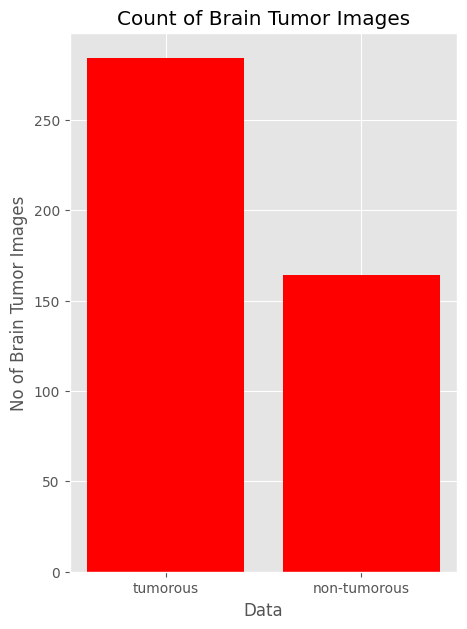

In [7]:
#plot

data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = list(data.keys()) # Convert typex to a list
values = list(data.values()) # Convert values to a list

fig = plt.figure(figsize = (5,7))

plt.bar(typex, values, color="red")
plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [8]:
#Data Agumentation
# 155(61%), 98(39%)
#imbalance

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout  # Corrected to Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [9]:
import os
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

def augmented_data(file_dir, n_generated_samples, save_to_dir):
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        brightness_range=(0.3, 1.0),
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )
    for filename in os.listdir(file_dir):
        image_path = os.path.join(file_dir, filename)
        image = cv2.imread(image_path)
        if image is not None:  # Check if image loaded successfully
            image = image.reshape((1,) + image.shape)
            save_prefix = 'aug_' + filename[:-4]
            i = 0
            for batch in datagen.flow(
                x=image,
                batch_size=1,
                save_to_dir=save_to_dir,
                save_prefix=save_prefix,
                save_format='jpg'  # or 'png' if your images are PNGs
            ):
                i += 1
                if i > n_generated_samples:
                    break
        else:
            print(f"Failed to load image: {image_path}")

start_time = time.time()

# Define paths
augmented_data_path = '/content/drive/My Drive/archive/augmented_data/'
yes_path = os.path.join(augmented_data_path, 'yes')  # Destination for augmented 'yes' images
no_path = os.path.join(augmented_data_path, 'no')   # Destination for augmented 'no' images

original_yes_path = '/content/drive/My Drive/archive/brain_tumor_dataset/yes' # Source of original 'yes' images
original_no_path = '/content/drive/My Drive/archive/brain_tumor_dataset/no'  # Source of original 'no' images

# Create destination directories if they don't exist
os.makedirs(yes_path, exist_ok=True)
os.makedirs(no_path, exist_ok=True)

# Generate augmented images
augmented_data(file_dir=original_yes_path, n_generated_samples=6, save_to_dir=yes_path)
augmented_data(file_dir=original_no_path, n_generated_samples=9, save_to_dir=no_path)

end_time = time.time()
execution_time = (end_time - start_time)
print(execution_time)

583.2859275341034


In [10]:
def data_summary(main_path):
  import os
  yes_path = os.path.join(main_path, 'yes')
  no_path = os.path.join(main_path, 'no')

  n_pos = len(os.listdir(yes_path))
  n_neg = len(os.listdir(no_path))
  n = n_pos + n_neg
  pos_per = (n_pos * 100.0) / n
  neg_per = (n_neg * 100.0) / n

  print(f"Number of sample: {n}")
  print(f"{n_pos}Percentage of positive samples: {pos_per} %")
  print(f"{n_neg}Percentage of negative samples: {neg_per} %")




In [11]:
augmented_data_path = '/content/drive/My Drive/archive/augmented_data/'
data_summary(augmented_data_path)

Number of sample: 78804
43637Percentage of positive samples: 55.374092685650474 %
35167Percentage of negative samples: 44.625907314349526 %


In [12]:
yes_path = '/content/drive/My Drive/archive/brain_tumor_dataset/yes'
no_path = '/content/drive/My Drive/archive/brain_tumor_dataset/no'

listyes = os.listdir(yes_path)  # Use full path
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir(no_path)   # Use full path
number_files_no = len(listno)
print(number_files_no)

284
164


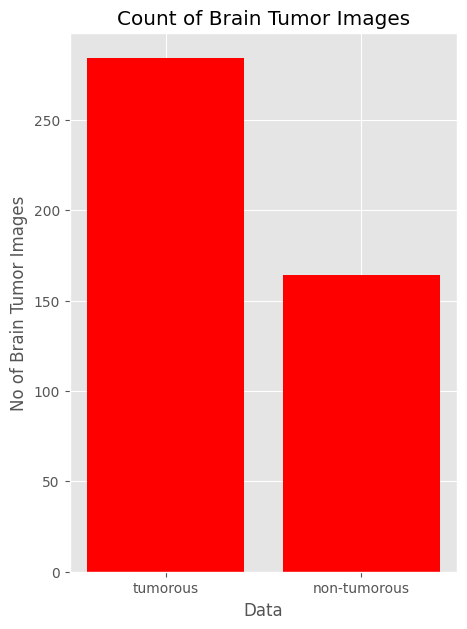

In [13]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = list(data.keys()) # Convert typex to a list
values = list(data.values()) # Convert values to a list

fig = plt.figure(figsize = (5,7))

plt.bar(typex, values, color="red")
plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [14]:
#Data preprocessing

# Convert BGR TO GRAY
# GaussianBlur
# Threshold
# Erode
# Dilate
# Find Contours

import imutils
def crop_brain_tumor(image, plot=False):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  gray = cv2.GaussianBlur(gray, (5,5), 0)

  thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
  thresh = cv2.erode(thresh, None, iterations=2)
  thresh = cv2.dilate(thresh, None, iterations=2)

  cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  c = max(cnts, key=cv2.contourArea)

  extLeft = tuple(c[c[:,:,0].argmin()][0])
  extRight = tuple(c[c[:,:,0].argmax()][0])
  extTop = tuple(c[c[:,:,1].argmin()][0])
  extBot = tuple(c[c[:,:,1].argmax()][0])

  new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

  if plot:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(image)

    plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(new_image)

    plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    plt.title('Cropped Image')

    plt.show()
  return new_image





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(280, 220, 3)


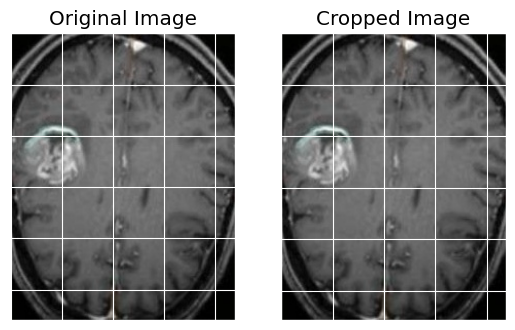

In [15]:
import cv2
from google.colab import drive
drive.mount('/content/drive')


img_path = '/content/drive/My Drive/archive/augmented_data/yes/aug_Y_1084_0_7780.jpg'
img = cv2.imread(img_path)

if img is not None:
    print(img.shape)  # Print the image shape
    crop_brain_tumor(img, True)
else:
    print("Error: Could not load image. Please check the path and file.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(228, 165, 3)


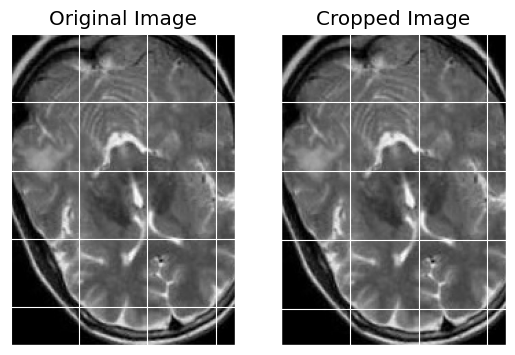

In [16]:
import cv2
from google.colab import drive
drive.mount('/content/drive')


img_path = '/content/drive/My Drive/archive/augmented_data/no/aug_N_1000_0_9766.jpg'
img = cv2.imread(img_path)

if img is not None:
    print(img.shape)  # Print the image shape
    crop_brain_tumor(img, True)
else:
    print("Error: Could not load image. Please check the path and file.")

In [ ]:
folder1 = '/content/drive/My Drive/archive/augmented_data/no/'
folder2 = '/content/drive/My Drive/archive/augmented_data/yes/'

for filename in os.listdir(folder1):
    img = cv2.imread(os.path.join(folder1, filename))
    img = crop_brain_tumor(img, False)
    cv2.imwrite(os.path.join(folder1, filename), img)

for filename in os.listdir(folder2):
    img = cv2.imread(os.path.join(folder2, filename))
    img = crop_brain_tumor(img, False)
    cv2.imwrite(os.path.join(folder2, filename), img)


In [ ]:
# image loading
from sklearn.utils import shuffle
import cv2
def load_data(dir_list, image_size):
  X = []
  y = []
  image_width, image_height = image_size

  for directory in dir_list:
    for filename in os.listdir(directory):
      image = cv2.imread(directory + '/' + filename)
      image = crop_brain_tumor(image, plot=False)
      image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC) # make same size
      image = image / 255.
      X.append(image)
      if directory[-3:] == 'yes':
        y.append([1])
      else:
        y.append([0])
  X = np.array(X)
  y = np.array(y)

  X, y = shuffle(X, y)
  print(f'Number of examples is: {len(X)}')
  print(f'X shape is: {X.shape}')
  print(f'y shape is: {y.shape}')
  return X, y


In [ ]:
augmented_path = '/content/drive/My Drive/archive/augmented_data/'
augmented_yes = os.path.join(augmented_path, 'yes')
augmented_no = os.path.join(augmented_path, 'no')

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X,y = load_data([augmented_yes, augmented_no], (IMG_WIDTH, IMG_HEIGHT))


In [ ]:
def plot_sample_images(X, y, n=50):
  for label in [0,1]:
    images = X[np.argwhere(y == label)]
    n_images = images[:n]

    columns_n = 10
    rows_n = int(n/columns_n)

    plt.figure(figsize=(20, 10))
    i = 1
    for image in n_images:
      plt.subplot(rows_n, columns_n, i+1)
      plt.imshow(n_images[0])

      plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)

      i += 1
    label_to_str = lambda label: "Yes" if label == 1 else "No"
    plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
    plt.show()

In [ ]:
#Data Spliting
# Train
# Test
# Validation
if not os.path.isdir('/content/drive/My Drive/archive/tumorous_and_non_tumorous'):
  base_dir = 'tumorous_and_non_tumorous'
  os.mkdir(base_dir)

if not os.path.isdir('/content/drive/My Drive/archive/tumorous_and_non_tumorous/train'):
  train_dir = os.path.join(base_dir, 'train')
  os.mkdir(train_dir)

if not os.path.isdir('/content/drive/My Drive/archive/tumorous_and_non_tumorous/valid'):
  valid_dir = os.path.join(base_dir, 'valid')
  os.mkdir(valid_dir)

if not os.path.isdir('/content/drive/My Drive/archive/tumorous_and_non_tumorous/test'):
  test_dir = os.path.join(base_dir, 'test')
  os.mkdir(test_dir)




In [ ]:
original_dataset_tumorous = '/content/drive/My Drive/archive/augmented_data/yes'
original_dataset_non_tumorous = '/content/drive/My Drive/archive/augmented_data/no'

In [ ]:
import os
import shutil

# Define base directory
base_dir = '/content/drive/My Drive/archive/tumorous_and_non_tumorous'

# Create directories if they don't exist
os.makedirs(base_dir, exist_ok=True)
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
valid_dir = os.path.join(base_dir, 'valid')
os.makedirs(valid_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

# Define paths to original datasets
original_dataset_tumorous = '/content/drive/My Drive/archive/augmented_data/yes'
original_dataset_non_tumorous = '/content/drive/My Drive/archive/augmented_data/no'

# --- Copy tumorous images to train directory ---
tumorous_train_dir = os.path.join(train_dir, 'tumorous')  # Create subdirectory for tumorous images
os.makedirs(tumorous_train_dir, exist_ok=True)

files = os.listdir(original_dataset_tumorous)
for i in range(0, 815):  # Assuming you want to copy 815 images
    fname = files[i]
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(tumorous_train_dir, fname)  # Copy to tumorous subdirectory
    shutil.copyfile(src, dst)

# --- Copy non-tumorous images to train directory ---
non_tumorous_train_dir = os.path.join(train_dir, 'non_tumorous')  # Create subdirectory for non-tumorous images
os.makedirs(non_tumorous_train_dir, exist_ok=True)

files = os.listdir(original_dataset_non_tumorous)
for i in range(0, 815):  # Assuming you want to copy 815 images
    fname = files[i]
    src = os.path.join(original_dataset_non_tumorous, fname)
    dst = os.path.join(non_tumorous_train_dir, fname)  # Copy to non_tumorous subdirectory
    shutil.copyfile(src, dst)

print("Files copied to train directory successfully!")

In [ ]:
# Define base directory
base_dir = '/content/drive/My Drive/archive/tumorous_and_non_tumorous'


# Define paths to original datasets
original_dataset_tumorous = '/content/drive/My Drive/archive/augmented_data/yes'
original_dataset_non_tumorous = '/content/drive/My Drive/archive/augmented_data/no'

# --- Copy tumorous images to test directory ---
tumorous_test_dir = os.path.join(test_dir, 'tumorous')  # Create subdirectory for tumorous images
os.makedirs(tumorous_test_dir, exist_ok=True)

files = os.listdir(original_dataset_tumorous)
for i in range(815, 815 + 100):  # Copy remaining tumorous images to test
    fname = files[i]
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(tumorous_test_dir, fname)
    shutil.copyfile(src, dst)

# --- Copy non-tumorous images to test directory ---
non_tumorous_test_dir = os.path.join(test_dir, 'non_tumorous')  # Create subdirectory for non-tumorous images
os.makedirs(non_tumorous_test_dir, exist_ok=True)

files = os.listdir(original_dataset_non_tumorous)
for i in range(815, 815 + 100):  # Copy remaining non-tumorous images to test
    fname = files[i]
    src = os.path.join(original_dataset_non_tumorous, fname)
    dst = os.path.join(non_tumorous_test_dir, fname)
    shutil.copyfile(src, dst)

print("Files copied to test directory successfully!")

In [ ]:
# Define base directory
base_dir = '/content/drive/My Drive/archive/tumorous_and_non_tumorous'


# Define paths to original datasets
original_dataset_tumorous = '/content/drive/My Drive/archive/augmented_data/yes'
original_dataset_non_tumorous = '/content/drive/My Drive/archive/augmented_data/no'

# --- Copy tumorous images to valid directory ---
tumorous_valid_dir = os.path.join(valid_dir, 'tumorous')  # Create subdirectory for tumorous images
os.makedirs(tumorous_valid_dir, exist_ok=True)

files = os.listdir(original_dataset_tumorous)
# Adjust the range as needed for your validation set size
for i in range(652, 815):  # Assuming you want to copy images from 652 to 814
    fname = files[i]
    src = os.path.join(original_dataset_tumorous, fname)
    dst = os.path.join(tumorous_valid_dir, fname)
    shutil.copyfile(src, dst)

# --- Copy non-tumorous images to valid directory ---
non_tumorous_valid_dir = os.path.join(valid_dir, 'non_tumorous')  # Create subdirectory for non-tumorous images
os.makedirs(non_tumorous_valid_dir, exist_ok=True)

files = os.listdir(original_dataset_non_tumorous)
# Adjust the range as needed for your validation set size
for i in range(652, 815):  # Assuming you want to copy images from 652 to 814
    fname = files[i]
    src = os.path.join(original_dataset_non_tumorous, fname)
    dst = os.path.join(non_tumorous_valid_dir, fname)
    shutil.copyfile(src, dst)

print("Files copied to valid directory successfully!")

In [ ]:
# Model Building

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=0.4,
    vertical_flip=0.4,
    rotation_range=40,
    width_shift_range=0.4,
    height_shift_range=0.4,
    fill_mode='nearest'

)

test_data_gen = ImageDataGenerator(
    rescale=1./255
)
valid_data_gen = ImageDataGenerator( rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(240, 240), class_mode='categorical', shuffle=True, seed = 42, color_mode='rgb')




In [ ]:
test_generator = train_datagen.flow_from_directory(test_dir, batch_size=32, target_size=(240, 240), class_mode='categorical', shuffle=True, seed = 42, color_mode='rgb')




In [ ]:
valid_generator = train_datagen.flow_from_directory(valid_dir, batch_size=32, target_size=(240, 240), class_mode='categorical', shuffle=True, seed = 42, color_mode='rgb')




In [ ]:
class_labels = train_generator.class_indices
class_name = {v: k for k, v in class_labels.items()}
class_name

In [ ]:
base_model = VGG19(input_shape = (240, 240, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
  layer.trainable = False

x = base_model.output
flat = Flatten()(x)
class_1 = Dense(256, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(2, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_01 = Model(base_model.input, output)
model_01.summary()

In [ ]:
#callback

filepath = 'model.keras'
es = EarlyStopping(monitor = 'val_loss', patience = 4, verbose = 1, mode='min')
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_weights_only=False, save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1, min_lr = 0.001)


In [ ]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0.9, nesterov=True)
model_01.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [ ]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs=1, validation_data=valid_generator, callbacks=[es, cp, lrr])

In [ ]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [ ]:
from google.colab import drive
import os

# Google Drive 마운트
drive.mount('/content/drive')

# Google Drive 경로 설정
filepath = '/content/drive/My Drive/archive/model_weights/vgg19_01.h5'

# 모델 저장
model_01.save(filepath, save_format='h5')

print(f"모델이 Google Drive에 저장되었습니다: {filepath}")

In [ ]:
model_01.load_weights(filepath)
vgg_val_eval_01 = model_01.evaluate(valid_generator)
vgg_test_eval_01 = model_01.evaluate(test_generator)

In [ ]:
print(f'Validation Loss: {vgg_val_eval_01[0]}')
print(f'Validation Accuracy: {vgg_val_eval_01[1]}')
print(f'Test Loss: {vgg_test_eval_01[0]}')
print(f'Test Accuracy: {vgg_test_eval_01[1]}')

In [ ]:
filename = test_generator.filenames
nb_samples = len(filename)
vgg_prediction_01 = model_01.predict(test_generator, steps=nb_samples, verbose=1)
y_pred = np.argmax(vgg_prediction_01, axis=1)

In [ ]:
#Increamental unfreezing and fine tuning

In [ ]:
base_model = VGG19(include_top = False, input_shape = (240, 240, 3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

x=base_model.output
flat=Flatten()(x)
class_1 = Dense(256, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(2, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_02 = Model(base_model.inputs, output)
model_02.load_weights(filepath)

set_trainable = False
for layer in base_model.layers:
  if layer.name in ['block5_conv4', 'block5_conv3']:
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

print(model_02.summary())

In [ ]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0.9, nesterov=True)
model_02.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [ ]:
history_02 = model_02.fit(train_generator, steps_per_epoch=10, epochs=1, validation_data=valid_generator, callbacks=[es, cp, lrr])

In [ ]:
#plat performance

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Unfrozen CNN)", fontsize=12)
max_epoch = len(history_02.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_02.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_02.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_02.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_02.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_unfrozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')



In [ ]:
from google.colab import drive
import os

# Google Drive 마운트
drive.mount('/content/drive')

# Google Drive 경로 설정
filepath2 = '/content/drive/My Drive/archive/model_weights/vgg19_02.h5'

# 모델 저장
model_02.save(filepath2, save_format='h5')

print(f"모델이 Google Drive에 저장되었습니다: {filepath2}")

In [ ]:
model_02.load_weights(filepath2)
vgg_val_eval_02 = model_02.evaluate(valid_generator)
vgg_test_eval_02 = model_02.evaluate(test_generator)

In [ ]:
#Unfreezing the entire network

base_model = VGG19(include_top = False, input_shape = (240, 240, 3))
base_model_layer_names = [layer.name for layer in base_model.layers]
base_model_layer_names

x=base_model.output
flat=Flatten()(x)
class_1 = Dense(256, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(2, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

model_03 = Model(base_model.inputs, output)
model_03.load_weights(filepath)

from google.colab import drive
import os


drive.mount('/content/drive')


filepath3 = '/content/drive/My Drive/archive/model_weights/vgg19_03.h5'

# 모델 저장
model_03.save(filepath2, save_format='h5')

sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum=0.9, nesterov=True)
model_03.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])



In [ ]:
model_03.summary()

In [ ]:
history_03 = model_03.fit(train_generator, steps_per_epoch=10, epochs=1, validation_data=valid_generator, callbacks=[es, cp, lrr])

In [ ]:

from google.colab import drive
import os


drive.mount('/content/drive')


filepath4 = '/content/drive/My Drive/archive/model_weights/vgg19_unfrozen.h5'

# 모델 저장
model_03.save(filepath3, save_format='h5')

model_03.load_weights(filepath3)
vgg_val_eval_03 = model_03.evaluate(valid_generator)
vgg_test_eval_03 = model_03.evaluate(test_generator)